# Building Model

In [4]:
from pathlib import Path
import numpy as np
import pandas as pd

from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# creating Path object for current working directory
directory = Path('./')
# creating Path object for additional data directory
additional_directory = directory / 'additional_data'
# create new directory for additional data
Path(additional_directory).mkdir(exist_ok=True)

# defining the directory to original data
directory = Path('./data/')
additional_directory = Path('./additional_data')

# list the .csv files for the project
for file in directory.glob('*.csv'):
    print(file)
    
# reading in .csv files to dataframes
vehicles = pd.read_csv(directory / 'vehicles2019.csv', dtype={'Accident_Index': str})
casualties = pd.read_csv(directory / 'casualties2019.csv', dtype={'Accident_Index': str})
# cleaned accidents DataFrame
accidents = pd.read_pickle('accidents_cleaned.pkl')

# convert column names to lowercase for ease of indexing
def lower_columns(df):
    """
    Defintion:
        convert column names to lower case
    """
    df.columns = map(str.lower, df.columns)
    
# converting all column names to lower case
lower_columns(vehicles)
lower_columns(casualties)

accidents.head(5)

data/vehicles2019.csv
data/accidents2019.csv
data/casualties2019.csv


,accident_index,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_(district),local_authority_(highway),...,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,lsoa_of_accident_location,district,converted_date,converted_time,datetime,decimal_time,day_of_year
0,2019010152270,-0.127949,51.436208,1,3,2,1,3,9,E09000022,...,0,1,3,E01003117,lambeth,2019-01-15,21:45:00,2019-01-15 21:45:00,21.750000,15
1,2019010157567,-0.123427,51.449310,1,3,2,2,3,9,E09000022,...,0,1,1,E01003023,lambeth,2019-01-15,08:42:00,2019-01-15 08:42:00,8.700000,15
2,2019010157732,-0.145106,51.461256,1,2,1,2,3,9,E09000022,...,0,1,1,E01003026,lambeth,2019-01-15,07:08:00,2019-01-15 07:08:00,7.133333,15
3,2019010157896,-0.240823,51.533125,1,3,2,1,3,28,E09000005,...,0,1,1,E01000535,brent,2019-01-15,21:05:00,2019-01-15 21:05:00,21.083333,15
4,2019010157795,0.161736,51.550272,1,3,1,1,3,16,E09000002,...,0,1,1,E01000035,barking and dagenham,2019-01-15,16:10:00,2019-01-15 16:10:00,16.166667,15


In [6]:
predictors = ['weather_conditions', 'speed_limit',
              'road_surface_conditions', 'light_conditions']

target = 'accident_severity'

# create a second DataFrame object with the predictors as its only columns
accidents2 = accidents.filter(['weather_conditions', 'speed_limit',
                               'road_surface_conditions',
                               'light_conditions',
                               'accident_severity'], axis=1)

# filter for positive values
accidents2 = accidents2.loc[(accidents2.weather_conditions > 0) & (accidents2.speed_limit > 0) & (accidents2.road_surface_conditions > 0) & (accidents2.light_conditions > 0) & (accidents2.accident_severity > 0), :]

In [7]:
# feature selection

selector = SelectKBest(chi2, k='all')
selector.fit(accidents2[predictors], accidents2[target])

scores = -np.log(selector.pvalues_)
scores

/var/folders/j8/lt4lg_hj4b3_s5g6ft7x110r0000gn/T/ipykernel_2849/3512610992.py:6: RuntimeWarning: divide by zero encountered in log
  scores = -np.log(selector.pvalues_)


array([ 37.50932143,          inf,   2.46673888, 109.15939154])

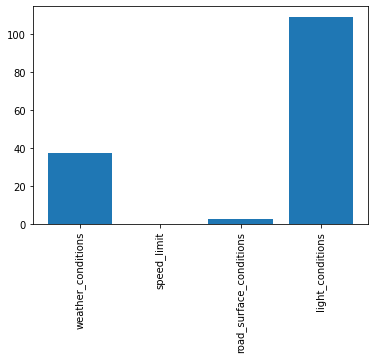

In [8]:
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

In [64]:
class FeatureSelection:
    def __init__(self):
        pass
        
    def subset_df(self, df, predictors, target):
        return df.filter(predictors + [target], axis=1)
    
    def filter_for_positive(self, df, predictors, target):
             return (df > 0).all(axis=1)
    
    def selection_stat(self, df, predictors, target, dtypes=1):
        """
        Generate the selection statistic
        Input:
            df - input data
            predictors - list of predictors
            target - target feature
            dtypes - data types of inputs and ouputs
                1 - categorical to categorical
                2 - numerical to numerical
                3 - numerical to categorical
        """
        if dtypes == 1:
            return SelectKBest(chi2, k='all')
        elif dtypes == 2:
            return SelectKBest(f_regression, k='all')
        elif dtypes == 3:
            return SelectKBest(f_classif, k='all')
    
    def fit_selector(self, df, selector, predictors, target):
        return selector.fit(df[predictors], df[target])


In [65]:
predictors = ['weather_conditions', 'speed_limit',
              'road_surface_conditions', 'light_conditions',
              'urban_or_rural_area', 'road_type',
              'carriageway_hazards', 'special_conditions_at_site']

target = 'accident_severity'

fs = FeatureSelection()

df = fs.subset_df(accidents, predictors, target)
df = fs.filter_for_positive(df, predictors, target)

selector = fs.selection_stat(df, predictors, target, 1)
fs.fit_selector(df, selector, predictors, target)

scores = -np.log(selector.pvalues_)

KeyError: "None of [Index(['weather_conditions', 'speed_limit', 'road_surface_conditions',\n       'light_conditions', 'urban_or_rural_area', 'road_type',\n       'carriageway_hazards', 'special_conditions_at_site'],\n      dtype='object')] are in the [index]"

In [69]:
new_df = pd.merge(accidents, vehicles, on='accident_index')
new_df = pd.merge(new_df, casualties, on='accident_index')

new_df.head(5)

,accident_index,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,local_authority_(district),local_authority_(highway),...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2019010152270,-0.127949,51.436208,1,3,2,1,3,9,E09000022,...,5,3,0,0,0,0,0,9,1,3
1,2019010152270,-0.127949,51.436208,1,3,2,1,3,9,E09000022,...,5,3,0,0,0,0,0,9,1,3
2,2019010157567,-0.123427,51.449310,1,3,2,2,3,9,E09000022,...,7,3,0,0,0,0,0,3,1,4
3,2019010157567,-0.123427,51.449310,1,3,2,2,3,9,E09000022,...,6,3,0,0,0,0,0,1,1,6
4,2019010157567,-0.123427,51.449310,1,3,2,2,3,9,E09000022,...,7,3,0,0,0,0,0,3,1,4


In [75]:
predictors = ['weather_conditions', 'speed_limit',
              'road_surface_conditions', 'light_conditions',
              'urban_or_rural_area', 'road_type',
              'carriageway_hazards', 'special_conditions_at_site',
              'vehicle_type', 'towing_and_articulation',
              'vehicle_manoeuvre', 'vehicle_location-restricted_lane',
              'hit_object_in_carriageway', 'vehicle_leaving_carriageway']


target = 'accident_severity'

fs = FeatureSelection()

new_df = fs.subset_df(new_df, predictors, target)

print(new_df)

#new_df = fs.filter_for_positive(new_df, predictors, target)

new_df = new_df[new_df > 0]

print(new_df)

selector = fs.selection_stat(new_df, predictors, target, 1)

# selector
fs.fit_selector(new_df, selector, predictors, target)


#scores = -np.log(selector.pvalues_)

        weather_conditions  speed_limit  road_surface_conditions  \
0                        1         30.0                      1.0   
1                        1         30.0                      1.0   
2                        1         30.0                      1.0   
3                        1         30.0                      1.0   
4                        1         30.0                      1.0   
...                    ...          ...                      ...   
179781                   1         30.0                      2.0   
179782                   1         30.0                      2.0   
179783                   1         30.0                      2.0   
179784                   1         30.0                      2.0   
179785                   1         30.0                      2.0   

        light_conditions  urban_or_rural_area  road_type  carriageway_hazards  \
0                    4.0                    1          2                  NaN   
1                    

KeyError: "['vehicle_type', 'towing_and_articulation', 'vehicle_manoeuvre', 'vehicle_location-restricted_lane', 'hit_object_in_carriageway', 'vehicle_leaving_carriageway'] not in index"

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (14,) and arg 1 with shape (8,).

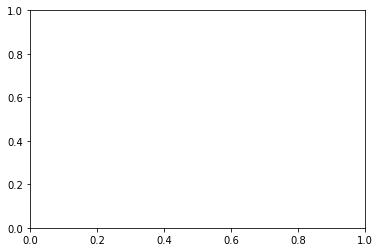

In [19]:
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

In [72]:
new_df = fs.subset_df(new_df, predictors, target)
new_df[new_df > 0]

,weather_conditions,speed_limit,road_surface_conditions,light_conditions,urban_or_rural_area,road_type,carriageway_hazards,special_conditions_at_site,accident_severity
0,1,30.0,1.0,4.0,1,2,NaN,NaN,3
1,1,30.0,1.0,4.0,1,2,NaN,NaN,3
2,1,30.0,1.0,1.0,1,6,NaN,NaN,3
3,1,30.0,1.0,1.0,1,6,NaN,NaN,3
4,1,30.0,1.0,1.0,1,6,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...
179781,1,30.0,2.0,1.0,1,6,NaN,NaN,3
179782,1,30.0,2.0,4.0,1,6,NaN,NaN,3
179783,1,30.0,2.0,4.0,1,6,NaN,NaN,3
179784,1,30.0,2.0,1.0,1,6,NaN,NaN,3


In [73]:
new_df

,weather_conditions,speed_limit,road_surface_conditions,light_conditions,urban_or_rural_area,road_type,carriageway_hazards,special_conditions_at_site,accident_severity
0,1,30,1,4,1,2,0,0,3
1,1,30,1,4,1,2,0,0,3
2,1,30,1,1,1,6,0,0,3
3,1,30,1,1,1,6,0,0,3
4,1,30,1,1,1,6,0,0,3
...,...,...,...,...,...,...,...,...,...
179781,1,30,2,1,1,6,0,0,3
179782,1,30,2,4,1,6,0,0,3
179783,1,30,2,4,1,6,0,0,3
179784,1,30,2,1,1,6,0,0,3
